# Linear models
* Linear regression
* Ridge
* Lasso
* LAD regression
* Huber regression
* Linear SVM

## Load data

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES], FEATURES
)

In [2]:
bestiaries.head()

,level,book,str,dex,con,int,wis,cha,ac,hp,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
0,8,Pathfinder #164: Hands of the Devil,5.0,5.0,3.0,-2.0,3.0,4.0,28.0,152,...,0,0,0,0,0,0,0,0,0,0
1,5,Pathfinder #163: Ruins of Gauntlight,5.0,2.0,4.0,4.0,2.0,2.0,22.0,75,...,0,0,0,0,0,0,0,0,0,0
2,3,Pathfinder #163: Ruins of Gauntlight,4.0,3.0,1.0,1.0,3.0,1.0,18.0,48,...,0,0,0,0,0,0,0,0,0,0
3,3,Pathfinder #164: Hands of the Devil,1.0,4.0,1.0,0.0,3.0,1.0,20.0,30,...,5,0,0,0,0,0,0,0,0,0
4,8,Pathfinder #164: Hands of the Devil,5.0,5.0,5.0,2.0,4.0,5.0,27.0,120,...,10,0,0,0,0,0,0,0,0,0


In [3]:
bestiaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 4506
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   level                   3833 non-null   int64  
 1   book                    3833 non-null   object 
 2   str                     3833 non-null   float64
 3   dex                     3833 non-null   float64
 4   con                     3833 non-null   float64
 5   int                     3833 non-null   float64
 6   wis                     3833 non-null   float64
 7   cha                     3833 non-null   float64
 8   ac                      3833 non-null   float64
 9   hp                      3833 non-null   int32  
 10  perception              3833 non-null   float64
 11  fortitude               3833 non-null   float64
 12  reflex                  3833 non-null   float64
 13  will                    3833 non-null   float64
 14  focus                   3833 non-null   

Scale data using MinMaxScaler

In [4]:
columns = [col for col in bestiaries.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(
    scaler.fit_transform(bestiaries[columns]), index=bestiaries.index
)
min_max_df["book"] = bestiaries["book"]
min_max_df["level"] = bestiaries["level"]
bestiaries = min_max_df
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness,book,level
0,0.588235,0.588235,0.357143,0.200000,0.470588,0.529412,0.509434,0.252087,0.156522,0.425532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8
1,0.588235,0.411765,0.428571,0.600000,0.411765,0.411765,0.396226,0.123539,0.130435,0.297872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,5
2,0.529412,0.470588,0.214286,0.400000,0.470588,0.352941,0.320755,0.078464,0.069565,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,3
3,0.352941,0.529412,0.214286,0.333333,0.470588,0.352941,0.358491,0.048414,0.104348,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,3
4,0.588235,0.588235,0.500000,0.466667,0.529412,0.588235,0.490566,0.198664,0.156522,0.361702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8


In [5]:
bestiaries.shape

(3833, 52)

In [6]:
bestiaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 4506
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   str                     3833 non-null   float64
 1   dex                     3833 non-null   float64
 2   con                     3833 non-null   float64
 3   int                     3833 non-null   float64
 4   wis                     3833 non-null   float64
 5   cha                     3833 non-null   float64
 6   ac                      3833 non-null   float64
 7   hp                      3833 non-null   float64
 8   perception              3833 non-null   float64
 9   fortitude               3833 non-null   float64
 10  reflex                  3833 non-null   float64
 11  will                    3833 non-null   float64
 12  focus                   3833 non-null   float64
 13  num_immunities          3833 non-null   float64
 14  land_speed              3833 non-null   

## Filter: get only bestiaries

In [7]:
import os
from training.splitting_dataset import split_dataframe, get_date_books_mapping


os.chdir("../../training")
books_dates_map = get_date_books_mapping()
os.chdir("../notebooks/models")

In [8]:
books_to_include = [
    book for _, row in books_dates_map["books"].iteritems() for book in row
]
bestiaries = bestiaries[bestiaries["book"].isin(books_to_include)]

In [9]:
os.chdir("../../training")
X_train, X_test, y_train, y_test = split_dataframe(bestiaries)
os.chdir("../notebooks/models")

In [10]:
X_train.size + X_test.size

81550

In [11]:
bestiaries[
    bestiaries["book"].str.contains("#", regex=False)
].size  # Adventure Paths have '#' in book/title

0

In [12]:
bestiaries.book.value_counts()

Pathfinder Bestiary                                    467
Pathfinder Bestiary 2                                  373
Pathfinder Bestiary 3                                  365
Pathfinder Kingmaker                                   181
Pathfinder Book of the Dead                             91
Pathfinder Gamemastery Guide                            83
Pathfinder Beginner Box                                 62
Pathfinder Abomination Vaults Hardcover Compilation      8
Pathfinder Player Core                                   1
Name: book, dtype: int64

In [13]:
X_test.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
651,0.588235,0.470588,0.428571,0.000000,0.411765,0.176471,0.452830,0.148581,0.104348,0.340426,...,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
652,0.000000,0.705882,0.357143,0.666667,0.588235,0.705882,0.547170,0.290484,0.191304,0.382979,...,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
656,0.411765,0.588235,0.285714,0.400000,0.411765,0.588235,0.396226,0.081803,0.095652,0.191489,...,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
657,0.588235,0.647059,0.428571,0.533333,0.411765,0.529412,0.490566,0.207012,0.139130,0.340426,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
659,0.647059,0.470588,0.428571,0.466667,0.647059,0.588235,0.490566,0.273790,0.156522,0.297872,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


##### Linear SVM

In [ ]:
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVR


clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
clf_linear_svr.fit(X_train, y_train)

y_pred = clf_linear_svr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from training.constants import RANDOM_STATE


clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
folds = KFold(n_splits=5, shuffle=True, random_state=0)
hyper_params = {"C": [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]}

model = GridSearchCV(
    estimator=clf_linear_svr,
    param_grid=hyper_params,
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.best_params_

In [ ]:
import numpy as np


clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
folds = KFold(n_splits=5, shuffle=True, random_state=0)
hyper_params = {"C": np.linspace(0.1, 100, num=1000)}

model = RandomizedSearchCV(
    estimator=clf_linear_svr,
    param_distributions=hyper_params,
    scoring="neg_mean_absolute_error",
    cv=folds,
    verbose=2,
    return_train_score=True,
    n_iter=100,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.best_params_

In [ ]:
clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
folds = KFold(n_splits=5, shuffle=True, random_state=0)
hyper_params = {"C": np.linspace(10, 30, num=20)}

model = GridSearchCV(
    estimator=clf_linear_svr,
    param_grid=hyper_params,
    scoring="neg_mean_absolute_error",
    cv=folds,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

In [ ]:
model.best_params_

In [ ]:
r

In [28]:
y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

0.43926036503851135

In [29]:
mean_squared_error(y_test, y_pred)

0.5036503988431489

In [15]:
from training.train_and_evaluate_models import train_and_evaluate_models


results = train_and_evaluate_models(
    [
        "linear_regression",
        "linear_regression_ridge",
        "linear_regression_lasso",
        "lad_regression",
        "huber_regression",
        "linear_svm",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
    thresholds=[0.05 * i for i in range(1, 20)],
    print_summary=True,
)

[I 2024-05-15 21:30:32,541] A new study created in memory with name: no-name-35bb3e85-e0ef-4ef8-8368-08a0ce511b1a
[I 2024-05-15 21:30:32,549] Trial 0 finished with value: 0.05665930831493746 and parameters: {'level_-1': 0.7706607176449396, 'level_0': 0.3821345532022996, 'level_1': 0.275244143261408, 'level_2': 0.5095638099339542, 'level_3': 0.32459608706321097, 'level_4': 0.9506556798865348, 'level_5': 0.35287672369488643, 'level_6': 0.921686317730876, 'level_7': 0.9652705945279673, 'level_8': 0.7995132628059648, 'level_9': 0.37873470047372493, 'level_10': 0.4130410880302189, 'level_11': 0.3276370274040795, 'level_12': 0.20085195314127746, 'level_13': 0.01628713198389453, 'level_14': 0.15486737019825247, 'level_15': 0.014991411222309847, 'level_16': 0.504235778899541, 'level_17': 0.8136613048171717, 'level_18': 0.7975359223748787, 'level_19': 0.8881161973795202, 'level_20': 0.4550449105505221}. Best is trial 0 with value: 0.05665930831493746.
[I 2024-05-15 21:30:32,549] Trial 1 finishe

==== linear_regression ====
	--> no_rounding
		--> train
			--> rmse: 0.500431834592485
			--> mae: 0.3501346027611697
		--> test
			--> rmse: 0.8107909242698775
			--> mae: 0.48722867454708935
	--> round 0.5
		--> train
			--> rmse: 0.48296971935727107
			--> mae: 0.21265636497424578
			--> accuracy: 0.7954378219278881
		--> test
			--> rmse: 0.7952062255644573
			--> mae: 0.38235294117647056
			--> accuracy: 0.6617647058823529
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.21118469462840322
			--> accuracy: 0.7961736571008095
		--> test
			--> rmse: 0.7998161553463028
			--> mae: 0.3897058823529412
			--> accuracy: 0.6544117647058824
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.17478390342855601
			--> 0: 0.34148312646405754
			--> 1: 0.02788177689460611
			--> 2: 0.05625630025526057
			--> 3: 0.6029748464254542
			--> 4: 0.022944905182660166
			--> 5: 0.06597555311278058
			--> 6: 0.0030895290101827823

[I 2024-05-15 21:30:52,730] A new study created in memory with name: no-name-dcd7f05f-5955-4c00-96f2-9dc74f0fc3e3
[I 2024-05-15 21:30:52,738] Trial 0 finished with value: -0.013245033112582781 and parameters: {'level_-1': 0.06093785128042439, 'level_0': 0.5330689063366739, 'level_1': 0.24315721015315173, 'level_2': 0.46126532538223064, 'level_3': 0.9181049809590027, 'level_4': 0.21673097401100072, 'level_5': 0.7289149041380641, 'level_6': 0.679504432469816, 'level_7': 0.5217590974230284, 'level_8': 0.23945378291880004, 'level_9': 0.26958239916547355, 'level_10': 0.222233752932545, 'level_11': 0.303384687513265, 'level_12': 0.7783377396047874, 'level_13': 0.35553301111502145, 'level_14': 0.9953937333604623, 'level_15': 0.9813295365153223, 'level_16': 0.7210136344066664, 'level_17': 0.519108471183877, 'level_18': 0.145910349297652, 'level_19': 0.12199952545772164, 'level_20': 0.3973673684456772}. Best is trial 0 with value: -0.013245033112582781.
[I 2024-05-15 21:30:52,738] Trial 1 finis

==== linear_regression_ridge ====
	--> no_rounding
		--> train
			--> rmse: 0.5011750284254647
			--> mae: 0.34971594930776434
		--> test
			--> rmse: 0.8115680877386973
			--> mae: 0.4808896658872765
	--> round 0.5
		--> train
			--> rmse: 0.4979723418770028
			--> mae: 0.22148638704930096
			--> accuracy: 0.7873436350257542
		--> test
			--> rmse: 0.7928912098063865
			--> mae: 0.3786764705882353
			--> accuracy: 0.6654411764705882
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.47914567090962523
			--> mae: 0.20897718910963944
			--> accuracy: 0.7991169977924945
		--> test
			--> rmse: 0.7998161553463028
			--> mae: 0.3897058823529412
			--> accuracy: 0.6544117647058824
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.08422945797731038
			--> 0: 0.6168739957965609
			--> 1: 0.027240011370326868
			--> 2: 0.021324493108701666
			--> 3: 0.07469458958480135
			--> 4: 0.12504823353489067
			--> 5: 0.3022110936842579
			--> 6: 0.03095466075807

[I 2024-05-15 21:31:02,505] A new study created in memory with name: no-name-972dde4a-25c1-4199-bf61-13c39d64a0d2
[I 2024-05-15 21:31:02,513] Trial 0 finished with value: 0.06181015452538632 and parameters: {'level_-1': 0.5956548641816121, 'level_0': 0.3137561004063729, 'level_1': 0.1909229660661964, 'level_2': 0.8824713458151577, 'level_3': 0.7935246181005768, 'level_4': 0.4371572463636919, 'level_5': 0.8855569318743202, 'level_6': 0.8020112627306087, 'level_7': 0.0002267887242888289, 'level_8': 0.6098177051656646, 'level_9': 0.9725699474048107, 'level_10': 0.5538170481892085, 'level_11': 0.5891441098702578, 'level_12': 0.871772880052931, 'level_13': 0.48570311775197283, 'level_14': 0.360336519716706, 'level_15': 0.9033810626007487, 'level_16': 0.8707615854350615, 'level_17': 0.37476947589809606, 'level_18': 0.38230087215192676, 'level_19': 0.16561002543624825, 'level_20': 0.654647423203993}. Best is trial 0 with value: 0.06181015452538632.
[I 2024-05-15 21:31:02,513] Trial 1 finished

==== linear_regression_lasso ====
	--> no_rounding
		--> train
			--> rmse: 0.5311708420389969
			--> mae: 0.364058463942409
		--> test
			--> rmse: 0.8229287235672565
			--> mae: 0.4612959954679016
	--> round 0.5
		--> train
			--> rmse: 0.5210788604500733
			--> mae: 0.23914643119941134
			--> accuracy: 0.7718910963944077
		--> test
			--> rmse: 0.7764928695555344
			--> mae: 0.33088235294117646
			--> accuracy: 0.7169117647058824
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.5146850126549788
			--> mae: 0.23105224429727741
			--> accuracy: 0.7807211184694628
		--> test
			--> rmse: 0.7882407813680822
			--> mae: 0.3492647058823529
			--> accuracy: 0.6985294117647058
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.9004205807210517
			--> 0: 0.0393900952813971
			--> 1: 0.03745148127388091
			--> 2: 0.00022645963480347892
			--> 3: 0.6017332620393092
			--> 4: 0.11500072568477405
			--> 5: 0.8950280955719527
			--> 6: 0.6840700106312138


[I 2024-05-15 21:31:36,557] A new study created in memory with name: no-name-21459214-a1c9-4142-8dff-4a3ef79729c9
[I 2024-05-15 21:31:36,565] Trial 0 finished with value: -0.044885945548197206 and parameters: {'level_-1': 0.8867106223711169, 'level_0': 0.04673312030947829, 'level_1': 0.033821843531505524, 'level_2': 0.8347320187088058, 'level_3': 0.24480067933964722, 'level_4': 0.7125055711308788, 'level_5': 0.24095660048787348, 'level_6': 0.4150275653119935, 'level_7': 0.7846332818044892, 'level_8': 0.343593371314337, 'level_9': 0.174761309668653, 'level_10': 0.3756415877637679, 'level_11': 0.19820307832264106, 'level_12': 0.989698543099822, 'level_13': 0.17549108118744217, 'level_14': 0.4876503726680388, 'level_15': 0.7663693716187674, 'level_16': 0.285357489569531, 'level_17': 0.49771180625193234, 'level_18': 0.8297749051422663, 'level_19': 0.37364724140943073, 'level_20': 0.898271039245055}. Best is trial 0 with value: -0.044885945548197206.
[I 2024-05-15 21:31:36,573] Trial 1 fini

==== lad_regression ====
	--> no_rounding
		--> train
			--> rmse: 0.530173623611452
			--> mae: 0.3391446280480407
		--> test
			--> rmse: 0.7496596653944367
			--> mae: 0.4421584895538352
	--> round 0.5
		--> train
			--> rmse: 0.4867637267511287
			--> mae: 0.20014716703458427
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.7351470441147051
			--> mae: 0.3272058823529412
			--> accuracy: 0.7169117647058824
	--> best_single_threshold
		--> threshold
			--> 0.5
		--> train
			--> rmse: 0.4867637267511287
			--> mae: 0.20014716703458427
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.7351470441147051
			--> mae: 0.3272058823529412
			--> accuracy: 0.7169117647058824
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.5457733193962518
			--> 0: 0.019702185261128612
			--> 1: 0.0026668933702181097
			--> 2: 0.06786902062531042
			--> 3: 0.49235420421349524
			--> 4: 0.031471493488664515
			--> 5: 0.5169616040690114
			--> 6: 0.625463108956027
			--> 7:

[I 2024-05-15 22:10:48,852] A new study created in memory with name: no-name-2518ee44-b17e-46b3-abee-734dcff1d9ea
[I 2024-05-15 22:10:48,860] Trial 0 finished with value: 0.03679175864606328 and parameters: {'level_-1': 0.11288492243959258, 'level_0': 0.8958853407179295, 'level_1': 0.4580535370198521, 'level_2': 0.35744432152316497, 'level_3': 0.6193823927457607, 'level_4': 0.38773384246199727, 'level_5': 0.20148872450346778, 'level_6': 0.5146379779156968, 'level_7': 0.6470050847109186, 'level_8': 0.9404338810703097, 'level_9': 0.9622021932043048, 'level_10': 0.08645193400795237, 'level_11': 0.8882989205519335, 'level_12': 0.6572675453683445, 'level_13': 0.729988898599701, 'level_14': 0.39545874921393787, 'level_15': 0.47801667168491, 'level_16': 0.5877512044102895, 'level_17': 0.3203325522256609, 'level_18': 0.3912895364380935, 'level_19': 0.7255516840915683, 'level_20': 0.040981205666518195}. Best is trial 0 with value: 0.03679175864606328.
[I 2024-05-15 22:10:48,868] Trial 1 finishe

==== huber_regression ====
	--> no_rounding
		--> train
			--> rmse: 0.5283108268441686
			--> mae: 0.3390792479466456
		--> test
			--> rmse: 0.7564790704143798
			--> mae: 0.4459779193581293
	--> round 0.5
		--> train
			--> rmse: 0.48449088759427017
			--> mae: 0.199411331861663
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.7351470441147051
			--> mae: 0.3272058823529412
			--> accuracy: 0.7169117647058824
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.1949963208241354
			--> accuracy: 0.8197203826342899
		--> test
			--> rmse: 0.7148632119256844
			--> mae: 0.33455882352941174
			--> accuracy: 0.7095588235294118
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.5911994239888992
			--> 0: 0.22796084783413886
			--> 1: 0.019950607903921933
			--> 2: 0.0026681721188316077
			--> 3: 0.22600264226124828
			--> 4: 0.6323257787632265
			--> 5: 0.3133811305548532
			--> 6: 0.10801357956189975
			--

C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
[I 2024-05-15 22:11:04,309] A new study created in memory with name: no-name-2016e819-1f46-483e-9040-3dbbfde67418
[I 2024-05-15 22:11:04,317] Trial 0 finished with value: 0.006622516556291391 and parameters: {'level_-1': 0.933429498487213, 'level_0': 0.0949405347320591, 'level_1': 0.881476114092977, 'level_2': 0.8928256129309665, 'level_3': 0.003825924054613239, 'level_4': 0.4101578777261269, 'level_5': 0.0016654545632958095, 'level_6': 0.7411339449696116, 'level_7': 0.5581462117621468, 'level_8': 0.17504449078325834, 'level_9': 0.44408802162937233, 'level_10': 0.06187097096316296, 'level_11': 0.4124654318075558, 'level_12': 0.3999943333232221, 'level_13': 0.31957038897757994, 'level_14': 0.201969409304

==== linear_svm ====
	--> no_rounding
		--> train
			--> rmse: 0.5325854754346457
			--> mae: 0.33488521486341394
		--> test
			--> rmse: 0.7154742082625153
			--> mae: 0.4384839716422865
	--> round 0.5
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.19793966151582046
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.6966305460192359
			--> mae: 0.3161764705882353
			--> accuracy: 0.7242647058823529
	--> best_single_threshold
		--> threshold
			--> 0.5
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.19793966151582046
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.6966305460192359
			--> mae: 0.3161764705882353
			--> accuracy: 0.7242647058823529
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.6293077483246882
			--> 0: 0.19067599625325266
			--> 1: 0.03901392355834902
			--> 2: 0.05922638973692782
			--> 3: 0.4616590805330796
			--> 4: 0.0011748609809703048
			--> 5: 0.6319905642403498
			--> 6: 0.45206766866571113
			--> 7: 

In [16]:
from training.train_and_evaluate_models import print_results

for model_name, model in results.items():
    print_results(model_name, model)

==== linear_regression ====
	--> no_rounding
		--> train
			--> rmse: 0.500431834592485
			--> mae: 0.3501346027611697
		--> test
			--> rmse: 0.8107909242698775
			--> mae: 0.48722867454708935
	--> round 0.5
		--> train
			--> rmse: 0.48296971935727107
			--> mae: 0.21265636497424578
			--> accuracy: 0.7954378219278881
		--> test
			--> rmse: 0.7952062255644573
			--> mae: 0.38235294117647056
			--> accuracy: 0.6617647058823529
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.21118469462840322
			--> accuracy: 0.7961736571008095
		--> test
			--> rmse: 0.7998161553463028
			--> mae: 0.3897058823529412
			--> accuracy: 0.6544117647058824
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.17478390342855601
			--> 0: 0.34148312646405754
			--> 1: 0.02788177689460611
			--> 2: 0.05625630025526057
			--> 3: 0.6029748464254542
			--> 4: 0.022944905182660166
			--> 5: 0.06597555311278058
			--> 6: 0.0030895290101827823

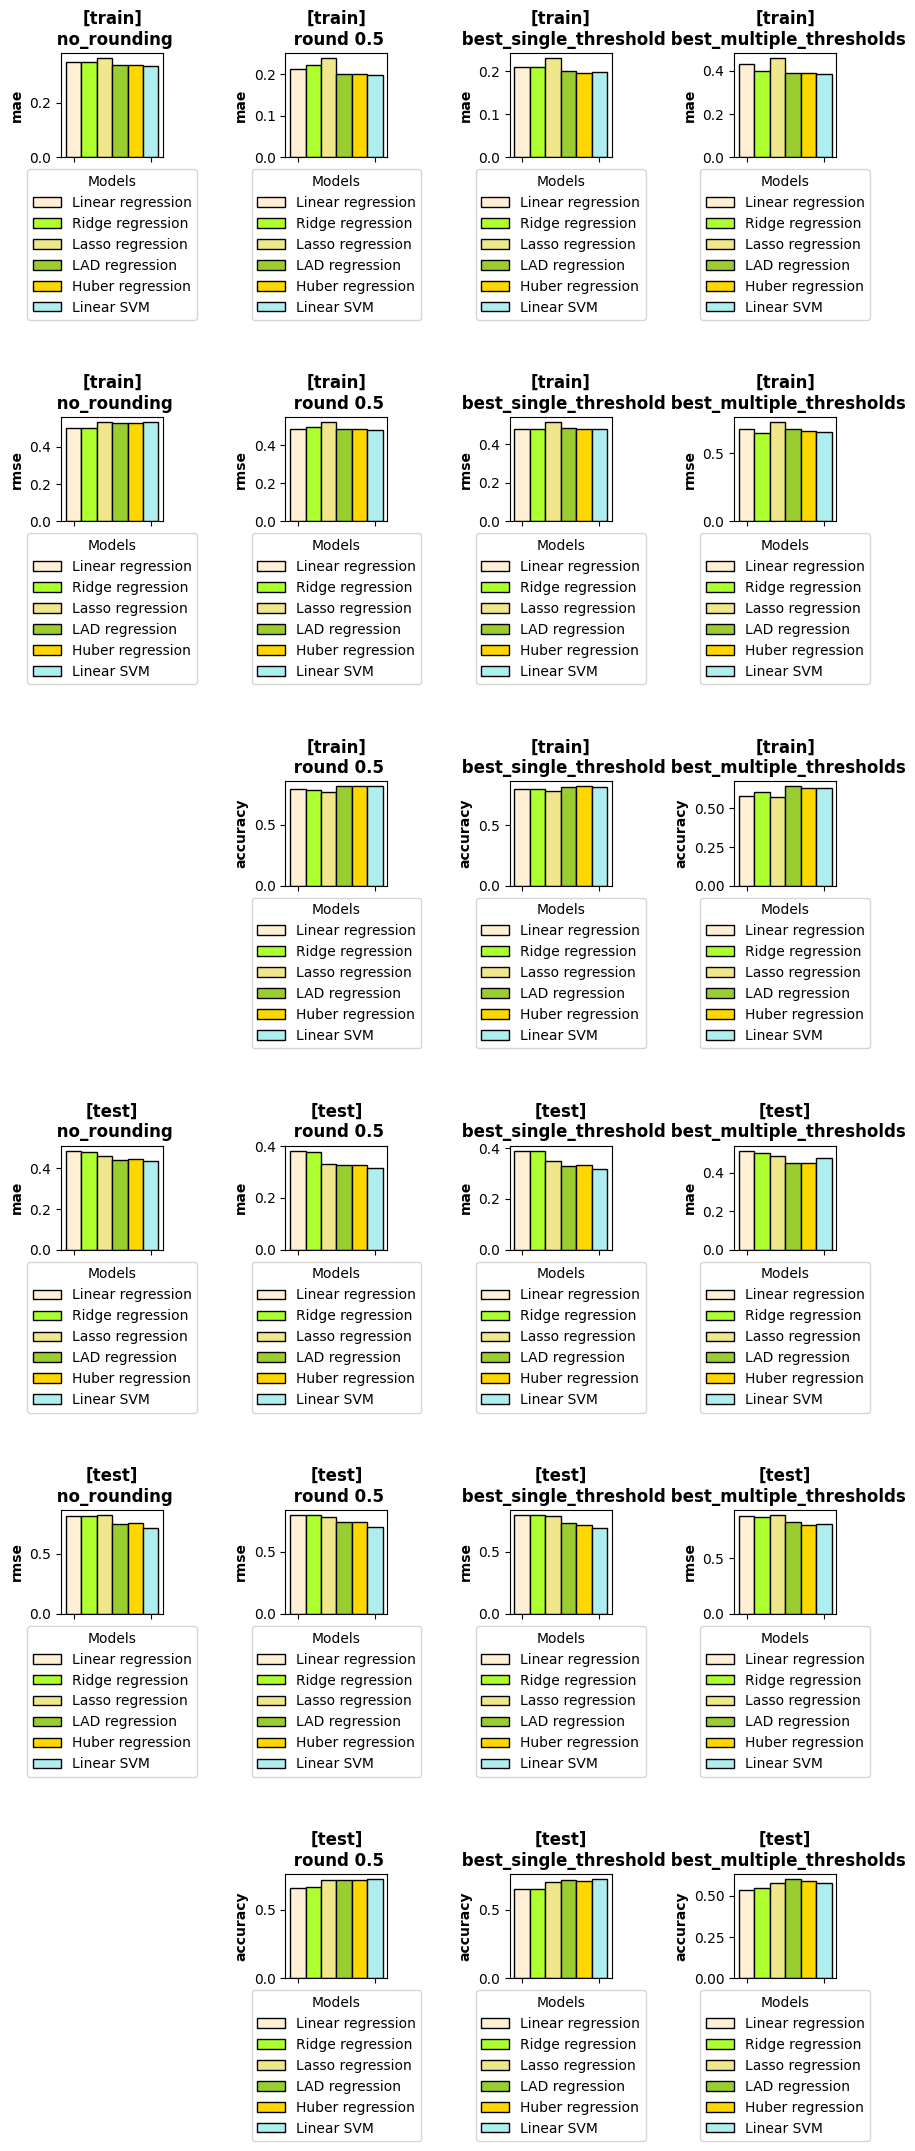

In [23]:
from training.results import plot_results

plot_results(
    results,
    measure_types=["mae", "rmse", "accuracy"],
    figsize=(10, 25),
    sets=[
        "train",
        "test",
    ],
    rounding_types=[
        "no_rounding",
        "round 0.5",
        "best_single_threshold",
        "best_multiple_thresholds",
    ],
    hspace=2.5,
    wspace=1.2,
)

In [24]:
results

{'linear_regression': {'no_rounding': {'train': {'rmse': 0.500431834592485,
    'mae': 0.3501346027611697},
   'test': {'rmse': 0.8107909242698775, 'mae': 0.48722867454708935}},
  'round 0.5': {'train': {'rmse': 0.48296971935727107,
    'mae': 0.21265636497424578,
    'accuracy': 0.7954378219278881},
   'test': {'rmse': 0.7952062255644573,
    'mae': 0.38235294117647056,
    'accuracy': 0.6617647058823529}},
  'best_single_threshold': {'threshold': 0.45,
   'train': {'rmse': 0.47991291827200916,
    'mae': 0.21118469462840322,
    'accuracy': 0.7961736571008095},
   'test': {'rmse': 0.7998161553463028,
    'mae': 0.3897058823529412,
    'accuracy': 0.6544117647058824}},
  'best_multiple_thresholds': {'thresholds': {-1: 0.17478390342855601,
    0: 0.34148312646405754,
    1: 0.02788177689460611,
    2: 0.05625630025526057,
    3: 0.6029748464254542,
    4: 0.022944905182660166,
    5: 0.06597555311278058,
    6: 0.0030895290101827823,
    7: 0.07121198021728213,
    8: 0.061204536500602

In [25]:
from training.train_and_evaluate_models import get_model_results, print_results


def evaluate_models(
    models: dict[str],
    X_train: pd.DataFrame,
    y_train: pd.Series,
    X_test: pd.DataFrame,
    y_test: pd.Series,
    thresholds: list[float],
    multiple_thresholds: bool = True,
    print_summary: bool = False,
):
    results = {}

    for model_name, model in models.items():

        results[model_name] = get_model_results(
            model, y_train, X_train, y_test, X_test, thresholds, multiple_thresholds
        )

        if print_summary:
            print_results(model_name, results[model_name])

    return results

In [27]:
results2 = evaluate_models(
    {model_name: values["model"] for model_name, values in results.items()},
    X_train,
    y_train,
    X_test,
    y_test,
    thresholds=[0.05 * i for i in range(5, 16)],
    print_summary=True,
)

[I 2024-05-15 22:31:08,417] A new study created in memory with name: no-name-7b241280-7f50-4a9f-88f4-34cfbc9b6689
[I 2024-05-15 22:31:08,425] Trial 0 finished with value: -0.0051508462104488595 and parameters: {'level_-1': 0.6763178970156866, 'level_0': 0.29733462222828266, 'level_1': 0.7825229617191104, 'level_2': 0.06475492344805145, 'level_3': 0.2849087181116352, 'level_4': 0.15543770698209103, 'level_5': 0.5297785118253604, 'level_6': 0.7506826499551599, 'level_7': 0.82637742601094, 'level_8': 0.2861401999505607, 'level_9': 0.8159651691357586, 'level_10': 0.918178727399715, 'level_11': 0.2840199776357254, 'level_12': 0.6758746156729145, 'level_13': 0.7650058483465576, 'level_14': 0.7301566123567692, 'level_15': 0.5008493828684262, 'level_16': 0.2699727698436001, 'level_17': 0.05499419364042568, 'level_18': 0.10276527868037766, 'level_19': 0.9275898284214747, 'level_20': 0.4856813038817378}. Best is trial 0 with value: -0.0051508462104488595.
[I 2024-05-15 22:31:08,434] Trial 1 fini

==== linear_regression ====
	--> no_rounding
		--> train
			--> rmse: 0.500431834592485
			--> mae: 0.3501346027611697
		--> test
			--> rmse: 0.8107909242698775
			--> mae: 0.48722867454708935
	--> round 0.5
		--> train
			--> rmse: 0.48296971935727107
			--> mae: 0.21265636497424578
			--> accuracy: 0.7954378219278881
		--> test
			--> rmse: 0.7952062255644573
			--> mae: 0.38235294117647056
			--> accuracy: 0.6617647058823529
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.21118469462840322
			--> accuracy: 0.7961736571008095
		--> test
			--> rmse: 0.7998161553463028
			--> mae: 0.3897058823529412
			--> accuracy: 0.6544117647058824
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.31173284756987807
			--> 0: 0.18124732961660306
			--> 1: 0.02282443340878732
			--> 2: 0.041822891667452615
			--> 3: 0.08569148188116726
			--> 4: 0.06554128639041337
			--> 5: 0.09781622952510635
			--> 6: 0.39774978662867605


[I 2024-05-15 22:31:18,811] Trial 11 finished with value: -0.24061810154525387 and parameters: {'level_-1': 0.4682665642403792, 'level_0': 0.07679240813440055, 'level_1': 0.003628224881465027, 'level_2': 0.008577526420605608, 'level_3': 0.015794020008669696, 'level_4': 0.4477609656801556, 'level_5': 0.07450201896792052, 'level_6': 0.5288426785953965, 'level_7': 0.07343066285394789, 'level_8': 0.02507214299619634, 'level_9': 0.26904699846615715, 'level_10': 0.9623484072325375, 'level_11': 0.9280574071087355, 'level_12': 0.2916060281086731, 'level_13': 0.3042750421363685, 'level_14': 0.4142543748158703, 'level_15': 0.6552149433375238, 'level_16': 0.488551065393896, 'level_17': 0.03997706027628194, 'level_18': 0.6070339036949902, 'level_19': 0.6400112560695976, 'level_20': 0.20121731228051842}. Best is trial 11 with value: -0.24061810154525387.
[I 2024-05-15 22:31:18,902] Trial 12 finished with value: -0.23693892568064753 and parameters: {'level_-1': 0.4948894394108877, 'level_0': 0.01903

==== linear_regression_ridge ====
	--> no_rounding
		--> train
			--> rmse: 0.5011750284254647
			--> mae: 0.34971594930776434
		--> test
			--> rmse: 0.8115680877386973
			--> mae: 0.4808896658872765
	--> round 0.5
		--> train
			--> rmse: 0.4979723418770028
			--> mae: 0.22148638704930096
			--> accuracy: 0.7873436350257542
		--> test
			--> rmse: 0.7928912098063865
			--> mae: 0.3786764705882353
			--> accuracy: 0.6654411764705882
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.47914567090962523
			--> mae: 0.20897718910963944
			--> accuracy: 0.7991169977924945
		--> test
			--> rmse: 0.7998161553463028
			--> mae: 0.3897058823529412
			--> accuracy: 0.6544117647058824
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.42841114673887787
			--> 0: 0.027198438274867703
			--> 1: 0.01952233305179567
			--> 2: 0.03261813524763727
			--> 3: 0.21656505463774342
			--> 4: 0.11099841435294883
			--> 5: 0.061209447292086966
			--> 6: 0.361016283246

[I 2024-05-15 22:31:28,556] Trial 11 finished with value: -0.15011037527593818 and parameters: {'level_-1': 0.3566813652023654, 'level_0': 0.42045876869238336, 'level_1': 0.5733391505660206, 'level_2': 0.00561777227377902, 'level_3': 0.45145117721896555, 'level_4': 0.03558897008671785, 'level_5': 0.654097335788721, 'level_6': 0.005030763573265519, 'level_7': 0.035511654170935714, 'level_8': 0.4134439668573762, 'level_9': 0.612997544793588, 'level_10': 0.5487184137473952, 'level_11': 0.9886659771257059, 'level_12': 0.5460535216436013, 'level_13': 0.035491190488541324, 'level_14': 0.7953073182057687, 'level_15': 0.5819545841958205, 'level_16': 0.09147507863928561, 'level_17': 0.027392458516958262, 'level_18': 0.7770129440581891, 'level_19': 0.013493881282670123, 'level_20': 0.5734383196922338}. Best is trial 11 with value: -0.15011037527593818.
[I 2024-05-15 22:31:28,662] Trial 12 finished with value: -0.15673289183222958 and parameters: {'level_-1': 0.3907312880997075, 'level_0': 0.4481

==== linear_regression_lasso ====
	--> no_rounding
		--> train
			--> rmse: 0.5311708420389969
			--> mae: 0.364058463942409
		--> test
			--> rmse: 0.8229287235672565
			--> mae: 0.4612959954679016
	--> round 0.5
		--> train
			--> rmse: 0.5210788604500733
			--> mae: 0.23914643119941134
			--> accuracy: 0.7718910963944077
		--> test
			--> rmse: 0.7764928695555344
			--> mae: 0.33088235294117646
			--> accuracy: 0.7169117647058824
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.5146850126549788
			--> mae: 0.23105224429727741
			--> accuracy: 0.7807211184694628
		--> test
			--> rmse: 0.7882407813680822
			--> mae: 0.3492647058823529
			--> accuracy: 0.6985294117647058
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.4987831641480469
			--> 0: 0.4805359163800015
			--> 1: 0.0009460003202864109
			--> 2: 0.0862660626701127
			--> 3: 0.33451595070237883
			--> 4: 0.07473844778907233
			--> 5: 0.5702641367405519
			--> 6: 0.07114649372272838


[I 2024-05-15 22:31:38,721] Trial 11 finished with value: -0.017660044150110375 and parameters: {'level_-1': 0.3721575957421189, 'level_0': 0.24113629451187107, 'level_1': 0.4115556785390454, 'level_2': 0.33987487436898334, 'level_3': 0.8807814531768177, 'level_4': 0.004635222908213145, 'level_5': 0.028407155280197105, 'level_6': 0.9682580322954732, 'level_7': 0.3330260945116574, 'level_8': 0.6768190370333449, 'level_9': 0.9676255828811496, 'level_10': 0.35099782578602357, 'level_11': 0.6130331186289399, 'level_12': 0.5708844353384563, 'level_13': 0.5835984099224214, 'level_14': 0.39812619740311794, 'level_15': 0.9726883847113132, 'level_16': 0.47182279790770704, 'level_17': 0.4759114332489388, 'level_18': 0.004309774622176854, 'level_19': 0.5069182867275461, 'level_20': 0.8269555596333105}. Best is trial 5 with value: -0.08314937454010302.
[I 2024-05-15 22:31:38,813] Trial 12 finished with value: -0.06475349521707138 and parameters: {'level_-1': 0.7490992100070379, 'level_0': 0.240009

==== lad_regression ====
	--> no_rounding
		--> train
			--> rmse: 0.530173623611452
			--> mae: 0.3391446280480407
		--> test
			--> rmse: 0.7496596653944367
			--> mae: 0.4421584895538352
	--> round 0.5
		--> train
			--> rmse: 0.4867637267511287
			--> mae: 0.20014716703458427
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.7351470441147051
			--> mae: 0.3272058823529412
			--> accuracy: 0.7169117647058824
	--> best_single_threshold
		--> threshold
			--> 0.5
		--> train
			--> rmse: 0.4867637267511287
			--> mae: 0.20014716703458427
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.7351470441147051
			--> mae: 0.3272058823529412
			--> accuracy: 0.7169117647058824
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.4798483114812887
			--> 0: 0.05004850499134995
			--> 1: 0.5031106733400686
			--> 2: 0.021255052536860865
			--> 3: 0.5201087200892209
			--> 4: 0.09212651339369188
			--> 5: 0.338317452250391
			--> 6: 0.2623661691938776
			--> 7: 0.00

[I 2024-05-15 22:31:47,988] Trial 11 finished with value: -0.09786607799852833 and parameters: {'level_-1': 0.05260567151612477, 'level_0': 0.41260165560246304, 'level_1': 0.21065465376140052, 'level_2': 0.6919061220761686, 'level_3': 0.3383645879434577, 'level_4': 0.22638471484349165, 'level_5': 0.6908489015284414, 'level_6': 0.052645921758902495, 'level_7': 0.605826972521529, 'level_8': 0.33649643214212305, 'level_9': 0.5270989935613073, 'level_10': 0.36416702517730065, 'level_11': 0.9750144544566528, 'level_12': 0.4037002524808651, 'level_13': 0.04207633378674548, 'level_14': 0.0013961055540453182, 'level_15': 0.008817555840690163, 'level_16': 0.0016547720767104979, 'level_17': 0.8360040057135959, 'level_18': 0.3138137911570711, 'level_19': 0.7334548183005745, 'level_20': 0.43527181905737566}. Best is trial 11 with value: -0.09786607799852833.
[I 2024-05-15 22:31:48,086] Trial 12 finished with value: -0.08977189109639441 and parameters: {'level_-1': 0.04193331882463798, 'level_0': 0

==== huber_regression ====
	--> no_rounding
		--> train
			--> rmse: 0.5283108268441686
			--> mae: 0.3390792479466456
		--> test
			--> rmse: 0.7564790704143798
			--> mae: 0.4459779193581293
	--> round 0.5
		--> train
			--> rmse: 0.48449088759427017
			--> mae: 0.199411331861663
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.7351470441147051
			--> mae: 0.3272058823529412
			--> accuracy: 0.7169117647058824
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.1949963208241354
			--> accuracy: 0.8197203826342899
		--> test
			--> rmse: 0.7148632119256844
			--> mae: 0.33455882352941174
			--> accuracy: 0.7095588235294118
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.2473865763339452
			--> 0: 0.002564670365914585
			--> 1: 0.00020138677346676417
			--> 2: 0.24786174106845038
			--> 3: 0.20582286206994752
			--> 4: 0.023167344827869495
			--> 5: 0.6384333262127627
			--> 6: 0.016188427648543245
	

[I 2024-05-15 22:31:57,174] Trial 11 finished with value: -0.06254598969830757 and parameters: {'level_-1': 0.3063239524588387, 'level_0': 0.25608906072975113, 'level_1': 0.9444023921250047, 'level_2': 0.0452396631677278, 'level_3': 0.6563372885996721, 'level_4': 0.002376868281272926, 'level_5': 0.6338884628704361, 'level_6': 0.3455656506651788, 'level_7': 0.5397908559746649, 'level_8': 0.7297171504684656, 'level_9': 0.9429839856149654, 'level_10': 0.027306353306557285, 'level_11': 0.6482854250189537, 'level_12': 0.9733409194028521, 'level_13': 0.6032931872260989, 'level_14': 0.5340791931140454, 'level_15': 0.6514467095610117, 'level_16': 0.006531047159285874, 'level_17': 0.9810870590799485, 'level_18': 0.9911650180092275, 'level_19': 0.052247989790222105, 'level_20': 0.6013350836781317}. Best is trial 6 with value: -0.11184694628403238.
[I 2024-05-15 22:31:57,291] Trial 12 finished with value: -0.09713024282560706 and parameters: {'level_-1': 0.5113574042712311, 'level_0': 0.286949706

==== linear_svm ====
	--> no_rounding
		--> train
			--> rmse: 0.5325854754346457
			--> mae: 0.33488521486341394
		--> test
			--> rmse: 0.7154742082625153
			--> mae: 0.4384839716422865
	--> round 0.5
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.19793966151582046
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.6966305460192359
			--> mae: 0.3161764705882353
			--> accuracy: 0.7242647058823529
	--> best_single_threshold
		--> threshold
			--> 0.5
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.19793966151582046
			--> accuracy: 0.8153053715967623
		--> test
			--> rmse: 0.6966305460192359
			--> mae: 0.3161764705882353
			--> accuracy: 0.7242647058823529
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.14148806824549104
			--> 0: 0.022221719382553136
			--> 1: 0.017790950815454745
			--> 2: 0.12472466380159723
			--> 3: 0.016919660933845435
			--> 4: 0.006002908949891647
			--> 5: 0.5857393156499006
			--> 6: 0.11148853454309897
			-->

In [28]:
for model_name, model in results2.items():
    print_results(model_name, model)

==== linear_regression ====
	--> no_rounding
		--> train
			--> rmse: 0.500431834592485
			--> mae: 0.3501346027611697
		--> test
			--> rmse: 0.8107909242698775
			--> mae: 0.48722867454708935
	--> round 0.5
		--> train
			--> rmse: 0.48296971935727107
			--> mae: 0.21265636497424578
			--> accuracy: 0.7954378219278881
		--> test
			--> rmse: 0.7952062255644573
			--> mae: 0.38235294117647056
			--> accuracy: 0.6617647058823529
	--> best_single_threshold
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.21118469462840322
			--> accuracy: 0.7961736571008095
		--> test
			--> rmse: 0.7998161553463028
			--> mae: 0.3897058823529412
			--> accuracy: 0.6544117647058824
	--> best_multiple_thresholds
		--> thresholds
			--> -1: 0.31173284756987807
			--> 0: 0.18124732961660306
			--> 1: 0.02282443340878732
			--> 2: 0.041822891667452615
			--> 3: 0.08569148188116726
			--> 4: 0.06554128639041337
			--> 5: 0.09781622952510635
			--> 6: 0.39774978662867605


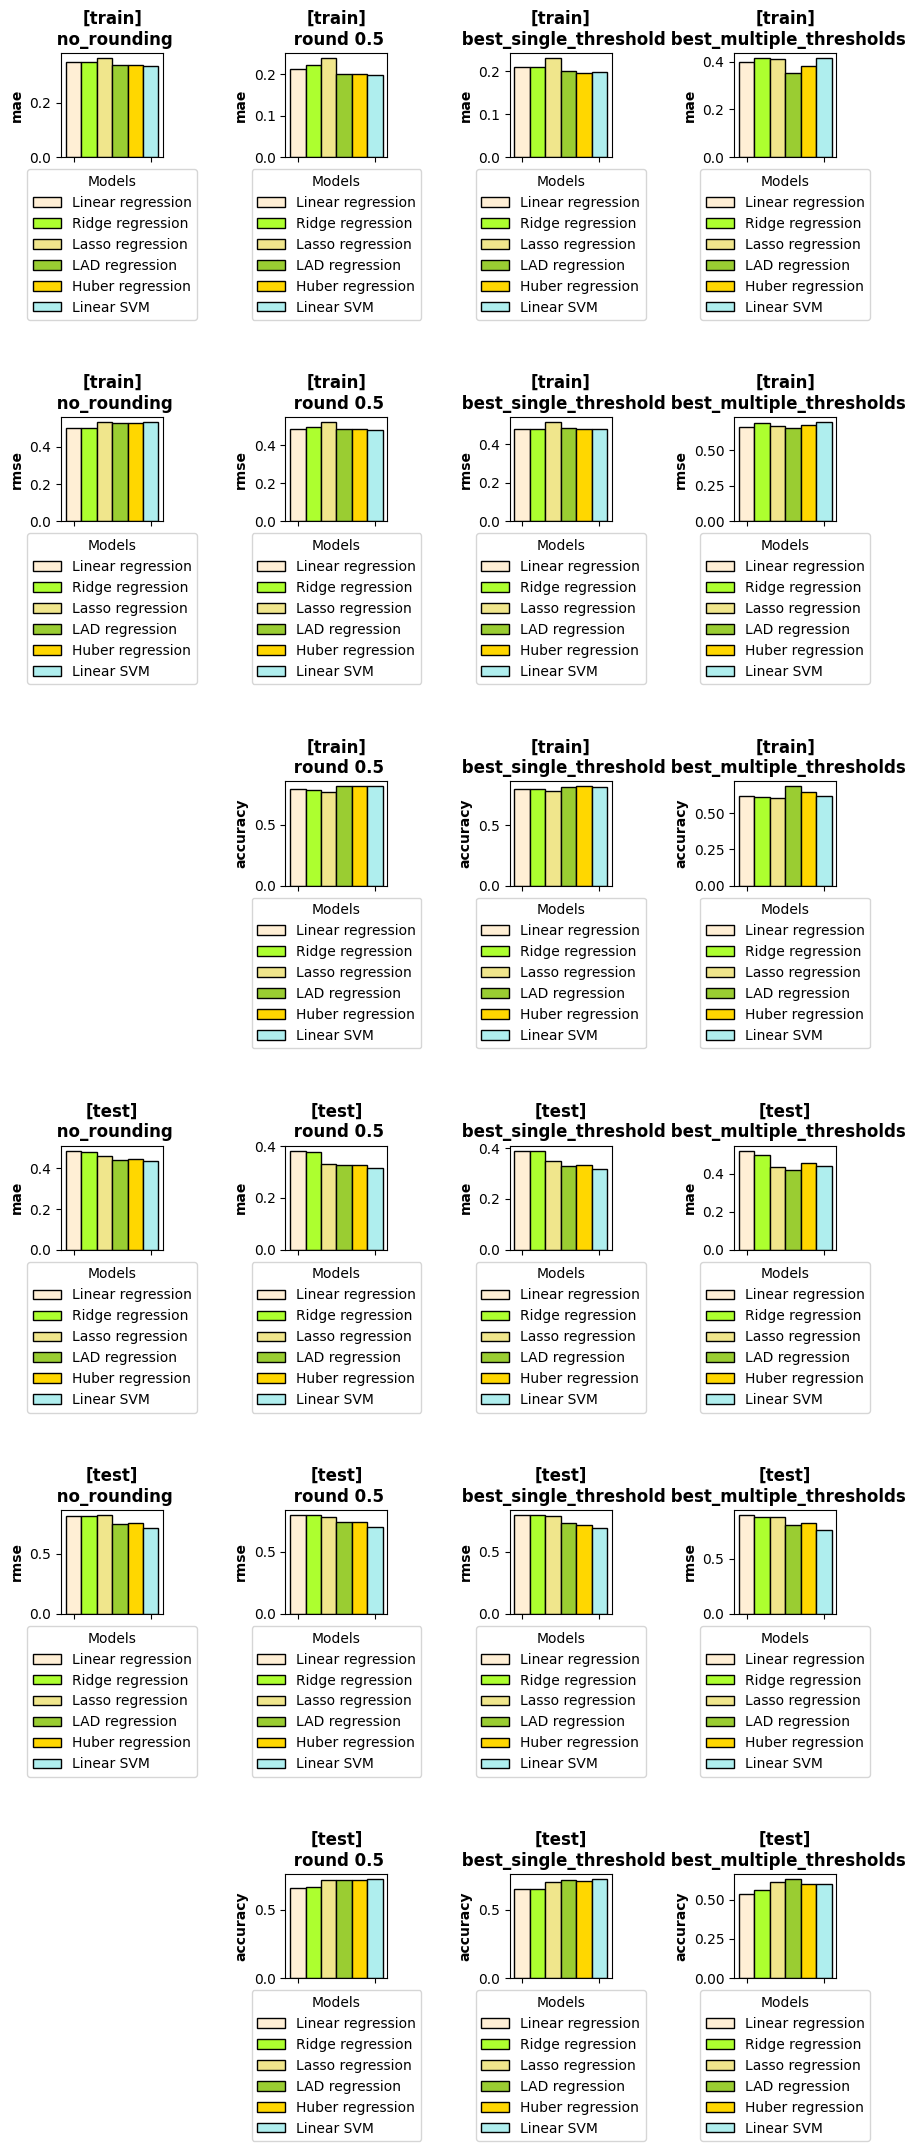

In [30]:
plot_results(
    results2,
    measure_types=["mae", "rmse", "accuracy"],
    figsize=(10, 25),
    sets=[
        "train",
        "test",
    ],
    rounding_types=[
        "no_rounding",
        "round 0.5",
        "best_single_threshold",
        "best_multiple_thresholds",
    ],
    hspace=2.5,
    wspace=1.2,
)